### 대전지하수 데이터 전처리

> 데이터 프레임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./대전지하수.csv',index_col='Date', parse_dates=True , encoding = 'cp949')
# 엑셀 파일을 데이터프레임 형식으로 변환하되 Date컬럼을 인덱스열로 지정하며 날짜 형식으로 해석하여 변환

In [3]:
df1

,수온(℃),수위(el.m),EC(㎲/㎝)
Date,,,
2012-01-01 00:00:00,16.3,44.31,764
2012-01-01 01:00:00,16.3,44.31,764
2012-01-01 02:00:00,16.3,44.31,764
2012-01-01 03:00:00,16.3,44.31,764
2012-01-01 04:00:00,16.3,44.31,764
...,...,...,...
2010-12-31 19:00:00,16.2,44.34,715
2010-12-31 20:00:00,16.2,44.34,715
2010-12-31 21:00:00,16.2,44.34,715


In [4]:
# 컬럼명 변경
df = df1[['수온(℃)','수위(el.m)','EC(㎲/㎝)']]
df.columns = ['temp', 'level', 'EC']
df.head(3)

,temp,level,EC
Date,,,
2012-01-01 00:00:00,16.3,44.31,764
2012-01-01 01:00:00,16.3,44.31,764
2012-01-01 02:00:00,16.3,44.31,764


In [5]:
df.describe()
# 기초 통계량 확인

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


> 히스토그램 이상치 확인

In [6]:
import warnings

warnings.filterwarnings('ignore')
# 엑셀 파일 끍어올 때 엑셀 데이터에 기본 스타일이 지정되어 있지 않을 경우 경고 메시지가 출력될 수 있으니 경고 메세지 제거하기

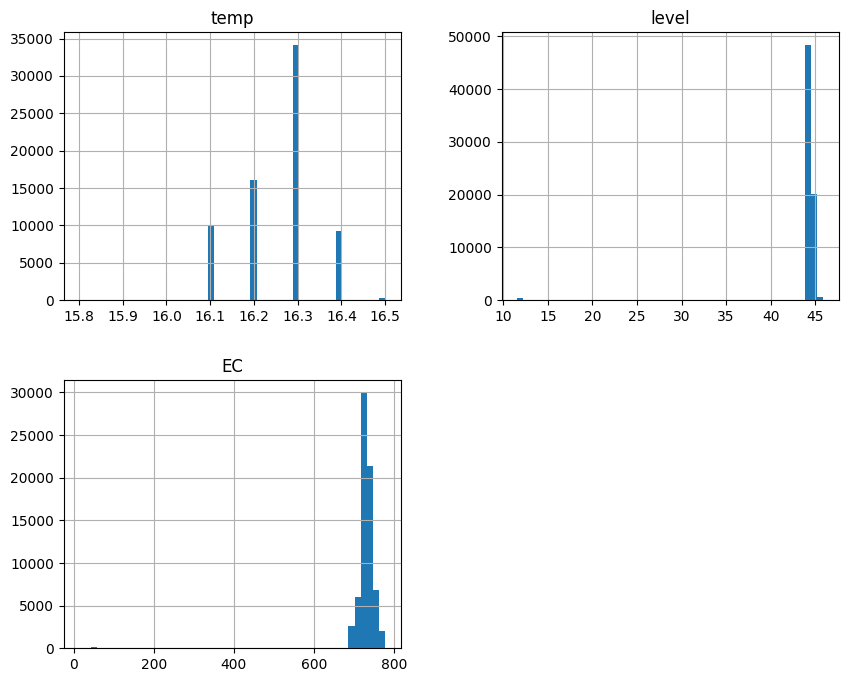

In [7]:
df.hist(bins = 50, figsize = (10,8))
plt.show()
# 그래프가 오른쪽에 대부분 치우쳐져 있음

<Axes: >

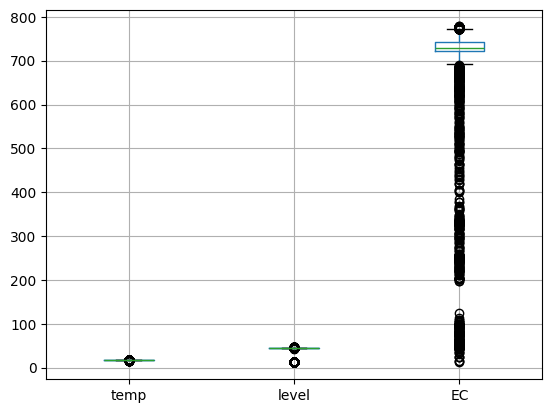

In [8]:
df.boxplot()
# 상자그래프 확인 시 EC데이터의 값이 커서 수온과 수위 이상치 유무 어렵

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001DB5AD31590>, <matplotlib.lines.Line2D object at 0x000001DB5AD316D0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DB5AD31810>, <matplotlib.lines.Line2D object at 0x000001DB5AD31950>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DB5AD31450>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DB5AD31A90>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DB5AD31BD0>], 'means': []})

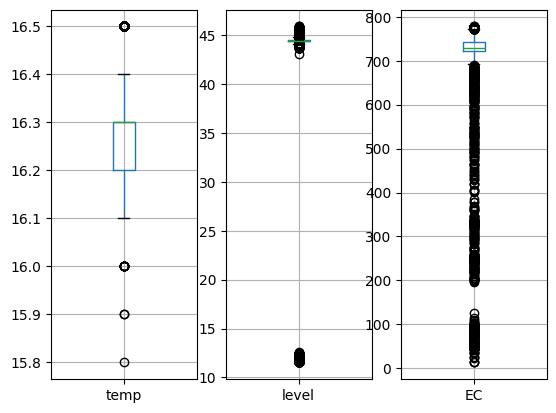

In [9]:
# 상자 따로 그려서 확인
plt.subplot(1,3,1)
df.boxplot(column = 'temp', return_type= 'both')  # both는 axes객체와 정보 딕셔너리를 튜플 형태로 반환
plt.subplot(1,3,2)
df.boxplot(column = 'level', return_type= 'both')
plt.subplot(1,3,3)
df.boxplot(column = 'EC', return_type= 'both')

# 지하수온 - 위아래 이상치 명확함
# 지하수위 - 낮은 영역에 이상치 나타남
# 지하전도도 - 낮은 영역에 이상치 나타남

<Axes: xlabel='Date'>

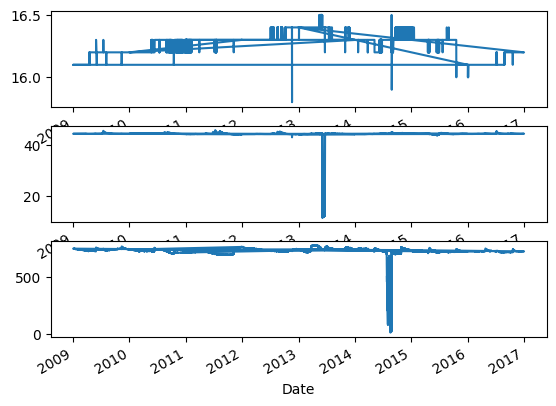

In [10]:
# 시간에 따른 데이터의 변화를 나타내는 시계열 그래프 그려서 확인

plt.subplot(3,1,1)  # 시간변화가 일어나야하니 가로로 길게
df['temp'].plot()
plt.subplot(3,1,2)  
df['level'].plot()
plt.subplot(3,1,3)  
df['EC'].plot()

# 지하수온 - 2012~2014 후반이 낮음
# 지하수위 - 2013 후반이 낮음
# 지하전도도 - 2014 비정상적으로 낮음

> IQR을 이용하여 이상치 확인

In [11]:
# IQR = Q3 - Q1

In [12]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)

iqr_level = q3_level - q1_level

print(iqr_level)

# 지하수위 데이터의 IQR은 약 0.18

0.17999999999999972


In [13]:
# 상한값과 하한값을 벗어나는 데이터는 이상치로 정하기

upper_level = q3_level + (iqr_level * 1.5) # 상한값
lower_level = q1_level - (iqr_level * 1.5) # 하한값

print( upper_level ,'/' , lower_level)

print((df['level'] > upper_level) . sum())
print((df['level'] < lower_level) . sum())


44.81999999999999 / 44.099999999999994
4492
1273


> 이상치 제거

<Axes: xlabel='Date'>

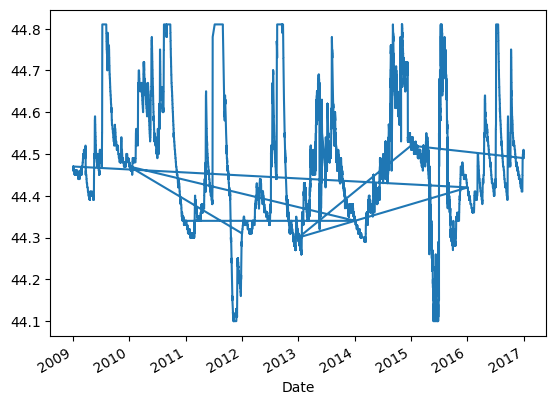

In [14]:
# 지하온도 이상치 제거
df_iqr_level = df[(df['level'] <= upper_level) & (df['level'] >= lower_level)]
df_iqr_level['level'].plot()

In [15]:
print(f"이상치 제거 전 행 수: {len(df)}")
print(f"이상치 제거 후 행 수: {len(df_iqr_level)}")

removed_outliers_count = len(df) - len(df_iqr_level)
print(f"제거된 이상치 개수: {removed_outliers_count}")

이상치 제거 전 행 수: 69548
이상치 제거 후 행 수: 63783
제거된 이상치 개수: 5765


In [16]:
# 지하온도 사분위수와 IQR 구한 후 이상치 개수
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)

iqr_temp = q3_temp - q1_temp
print(f'지하온도 IQR:{iqr_temp}')

upper_temp = q3_temp + ( iqr_temp * 1.5)
lower_temp = q1_temp - (iqr_temp * 1.5)
print( upper_temp , '/' , lower_temp)
print( (df['temp'] > upper_temp) .sum())
print( (df['temp'] < lower_temp) .sum())

# 이상치 개수가 적어 굳이 변화 X

지하온도 IQR:0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [17]:
# 지하전도도 사분위수와 IQR 구한 후 이상치 개수
q3_EC = df['EC'].quantile(q=0.75)
q1_EC = df['EC'].quantile(q=0.25)

iqr_EC = q3_EC - q1_EC
print(f'지하전도도 IQR:{iqr_EC}')

upper_EC = q3_EC + ( iqr_EC * 1.5)
lower_EC = q1_EC - (iqr_EC * 1.5)
print( upper_EC , '/' , lower_EC)
print( (df['EC'] > upper_EC) .sum())
print( (df['EC'] < lower_EC) .sum())

지하전도도 IQR:20.0
772.0 / 692.0
831
788


In [18]:
# features가 여러개일땐 이상치를 한꺼번에 제거해야 데이터 손실 막을 수 있음.

df_iqr = df[
    (df['temp'] > lower_temp) & (df['temp'] < upper_temp) &\
    (df['level'] > lower_level) & (df['level'] < upper_level) &\
    (df['EC'] > lower_EC) & (df['EC'] < upper_EC)
]


In [19]:
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'EC'}>, <Axes: >]], dtype=object)

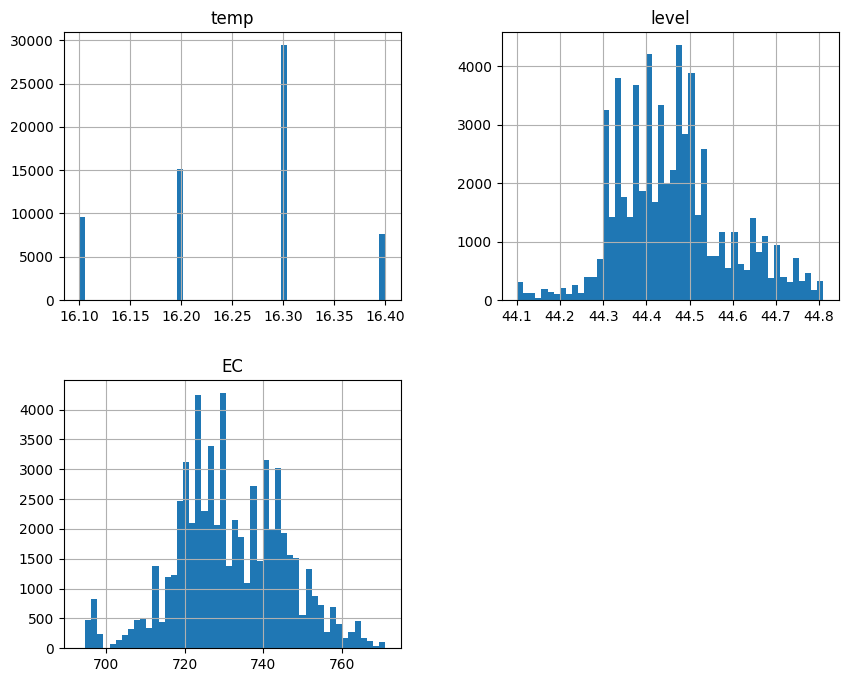

In [20]:
df_iqr.hist(bins = 50, figsize=(10, 8))

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001DB619C8A50>, <matplotlib.lines.Line2D object at 0x000001DB619C8B90>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DB619C8CD0>, <matplotlib.lines.Line2D object at 0x000001DB619C8E10>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DB619C8910>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DB619C8F50>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DB619C9090>], 'means': []})

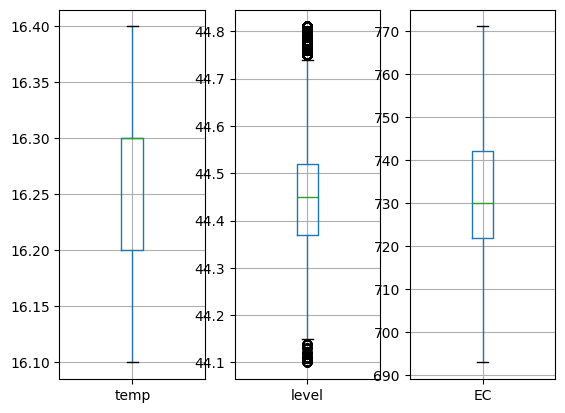

In [21]:

plt.subplot(1,3,1)
df_iqr.boxplot(column = 'temp', return_type= 'both')  
plt.subplot(1,3,2)
df_iqr.boxplot(column = 'level', return_type= 'both')
plt.subplot(1,3,3)
df_iqr.boxplot(column = 'EC', return_type= 'both')

<Axes: xlabel='Date'>

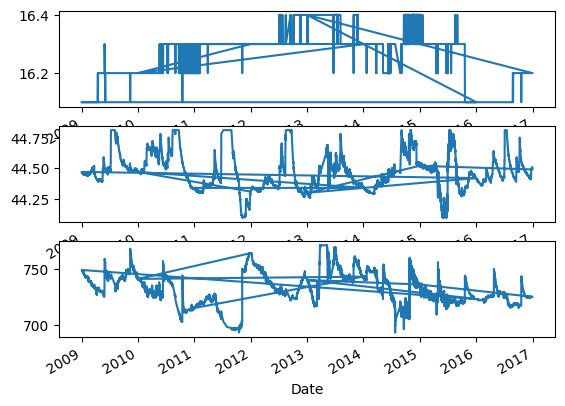

In [22]:
plt.subplot(3,1,1)  # 시간변화가 일어나야하니 가로로 길게
df_iqr['temp'].plot()
plt.subplot(3,1,2)  
df_iqr['level'].plot()
plt.subplot(3,1,3)  
df_iqr['EC'].plot()

In [23]:
# 정제된 데이터 저장
df_iqr.to_csv('대전지하수_정제.csv', encoding='cp949')

### 대전지하수 정제파일 표준화와 정규화

In [24]:
ddf = pd.read_csv('./대전지하수_정제.csv')
ddf.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


In [25]:
ddf = ddf[['level','EC']]   # 스케일링 할 열 선택 후 기초통계량 추출
ddf.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


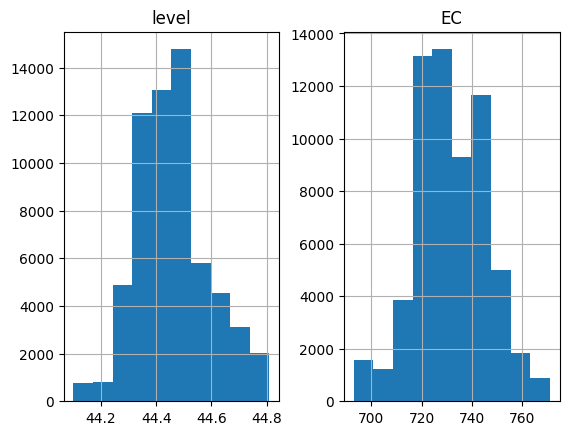

In [26]:
ddf.hist()
plt.show()

# 변수의 범위가 많은 다른 것을 고려하지 않을 경우 전기전도도의 산포도가 지하수위의 산포도보다 크다고 오해할 수 있음

In [27]:
# 사본 생성
ddf1 = ddf.copy()
ddf1.head(3)

,level,EC
0,44.31,764
1,44.31,764
2,44.31,764


In [28]:
level_specific_data = ddf1[ddf1['EC'] == 736]
print(level_specific_data.head())

      level   EC
3146  44.39  736
3174  44.38  736
3192  44.38  736
3218  44.38  736
3219  44.38  736


In [29]:
# 새로운 컬럼 추가하여 평균과 표준편차 구함
ddf1 [ 'level_z_score'] = (ddf1['level'] - ddf1['level'].mean()) / ddf1['level'].std()
ddf1 [ 'EC_z_score'] = (ddf1['EC'] - ddf1['EC'].mean()) / ddf1['EC'].std()
ddf1.head()

,level,EC,level_z_score,EC_z_score
0,44.31,764,-1.167204,2.326702
1,44.31,764,-1.167204,2.326702
2,44.31,764,-1.167204,2.326702
3,44.31,764,-1.167204,2.326702
4,44.31,764,-1.167204,2.326702


In [30]:
ddf1.describe()

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,1.328621e-14,-2.045164e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


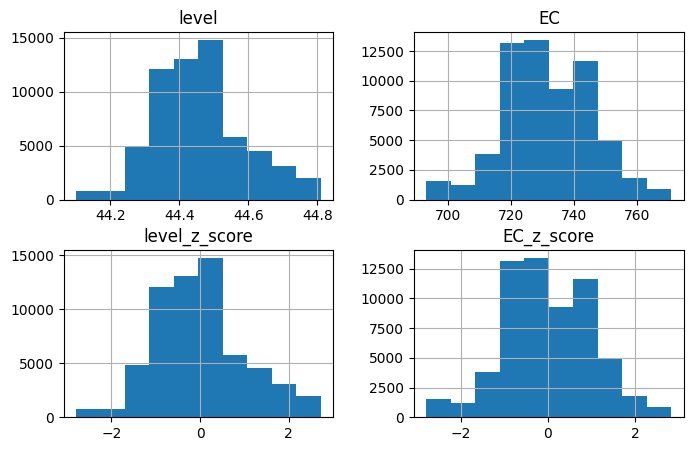

In [32]:
ddf1.hist(figsize = (8,5))
plt.show()

In [35]:
ddf2 = ddf.copy()
ddf2_standard = (ddf2 - ddf2.mean()) / ddf2.std()
ddf2_standard.head(3)

,level,EC
0,-1.167204,2.326702
1,-1.167204,2.326702
2,-1.167204,2.326702


In [38]:
ddf3 = ddf.copy()
ddf3['lavel_minmax'] = (ddf3['level'] - ddf3['level'].min()) / (ddf3['level'].max() -ddf3['level'].min())
ddf3['EC_minmax'] = (ddf3['EC'] - ddf3['EC'].min()) / (ddf3['EC'].max() -ddf3['EC'].min())

ddf3.head()

,level,EC,lavel_minmax,EC_minmax
0,44.31,764,0.295775,0.910256
1,44.31,764,0.295775,0.910256
2,44.31,764,0.295775,0.910256
3,44.31,764,0.295775,0.910256
4,44.31,764,0.295775,0.910256


In [40]:
ddf3.describe()
# 정규화 이후 최솟값 0 최댓값 1

,level,EC,lavel_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


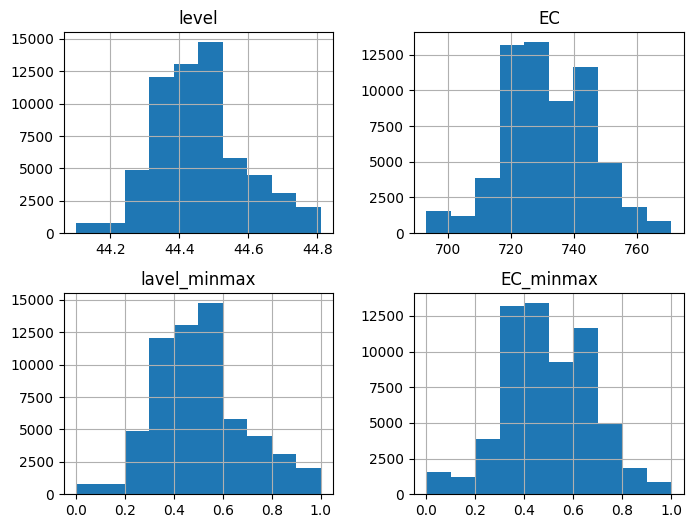

In [41]:
ddf3.hist(figsize=(8,6))
plt.show()